In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [3]:
df = pd.read_csv("Vehicle_fraud_Insurance_.csv")


In [4]:
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [5]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  object 
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  object 
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  object 
 6   MonthClaimed          15420 non-null  object 
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15404 non-null  float64
 11  Fault                 15420 non-null  object 
 12  PolicyType            15420 non-null  object 
 13  VehicleCategory       15412 non-null  object 
 14  VehiclePrice          15420 non-null  object 
 15  FraudFound_P       

In [6]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [7]:
df.shape


(15420, 33)

In [8]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15404.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855687,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.484418,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [9]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [10]:
# View first rows
df.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [11]:
# Check missing values
print(df.isnull().sum())


Month                    0
WeekOfMonth              0
DayOfWeek                0
Make                     0
AccidentArea             0
DayOfWeekClaimed         0
MonthClaimed             0
WeekOfMonthClaimed       0
Sex                      0
MaritalStatus            0
Age                     16
Fault                    0
PolicyType               0
VehicleCategory          8
VehiclePrice             0
FraudFound_P             0
PolicyNumber             0
RepNumber                0
Deductible               0
DriverRating             0
Days_Policy_Accident     0
Days_Policy_Claim        0
PastNumberOfClaims       0
AgeOfVehicle             0
AgeOfPolicyHolder        0
PoliceReportFiled        0
WitnessPresent           0
AgentType                0
NumberOfSuppliments      0
AddressChange_Claim      0
NumberOfCars             0
Year                     0
BasePolicy               0
dtype: int64


In [12]:
df.dropna()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [13]:
df.drop_duplicates()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15415    False
15416    False
15417    False
15418    False
15419    False
Length: 15420, dtype: bool

In [15]:
# Understand Dataset

# Target variable
print(df['FraudFound_P'].value_counts())


FraudFound_P
0    14497
1      923
Name: count, dtype: int64


In [16]:
# Fraud percentage
print(df['FraudFound_P'].value_counts(normalize=True) * 100)
 # 1 means froud
 # 0 means non-froud

FraudFound_P
0    94.014267
1     5.985733
Name: proportion, dtype: float64


In [17]:
# Data Cleaning

# Drop unnecessary ID columns
df.drop(['PolicyNumber', 'RepNumber'], axis=1, inplace=True)



In [18]:
# Check duplicates
df.drop_duplicates(inplace=True)


In [19]:
#Data Pre-Processing
#Encode Categorical Columns

label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])


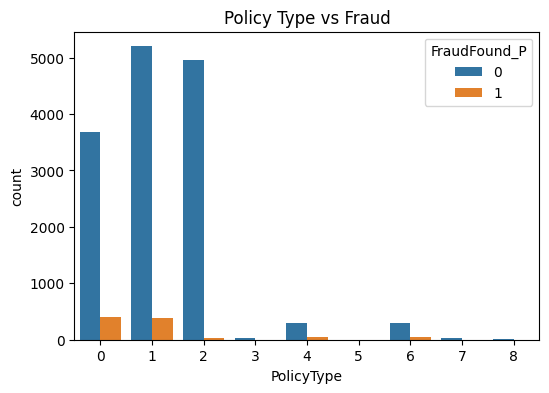

In [20]:
# Exploratory Data Analysis (EDA)

#1.Policy Type vs Fraud

plt.figure(figsize=(6,4))
sns.countplot(x='PolicyType', hue='FraudFound_P', data=df)
plt.title('Policy Type vs Fraud')
plt.show()

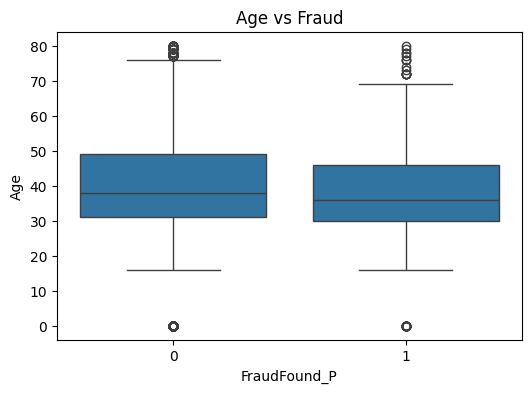

In [21]:
# 2.Age vs Fraud
plt.figure(figsize=(6,4))
sns.boxplot(x='FraudFound_P', y='Age', data=df)
plt.title('Age vs Fraud')
plt.show()


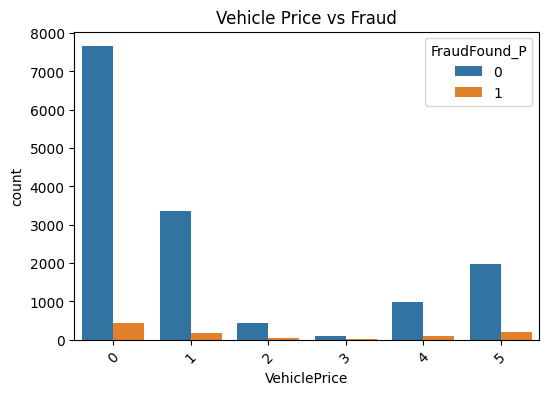

In [22]:
# 3.Vehicle Price vs Fraud
plt.figure(figsize=(6,4))
sns.countplot(x='VehiclePrice', hue='FraudFound_P', data=df)
plt.xticks(rotation=45)
plt.title('Vehicle Price vs Fraud')
plt.show()


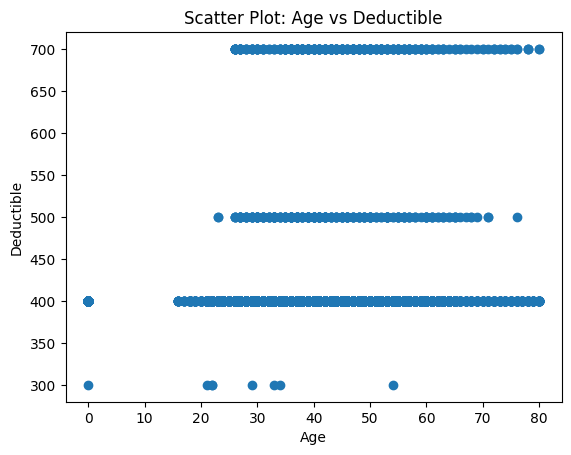

In [23]:
plt.figure()
plt.scatter(df['Age'], df['Deductible'])
plt.xlabel("Age")
plt.ylabel("Deductible")
plt.title("Scatter Plot: Age vs Deductible")
plt.show()



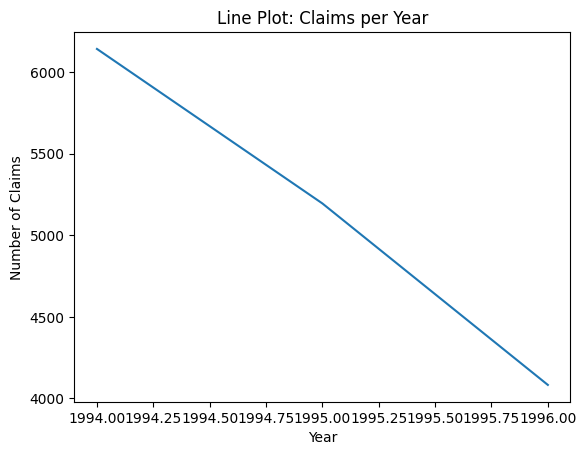

In [24]:
year_counts = df['Year'].value_counts().sort_index()

plt.figure()
plt.plot(year_counts.index, year_counts.values)
plt.xlabel("Year")
plt.ylabel("Number of Claims")
plt.title("Line Plot: Claims per Year")
plt.show()


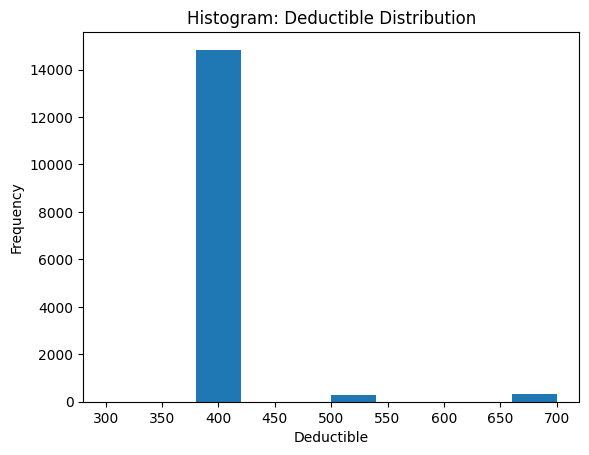

In [25]:
plt.figure()
plt.hist(df['Deductible'])
plt.xlabel("Deductible")
plt.ylabel("Frequency")
plt.title("Histogram: Deductible Distribution")
plt.show()

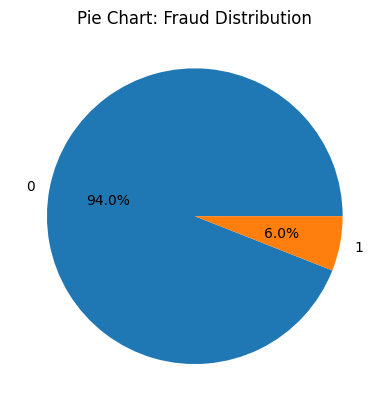

In [26]:
fraud_counts = df['FraudFound_P'].value_counts()

plt.figure()
plt.pie(fraud_counts.values, labels=fraud_counts.index, autopct='%1.1f%%')
plt.title("Pie Chart: Fraud Distribution")
plt.show()


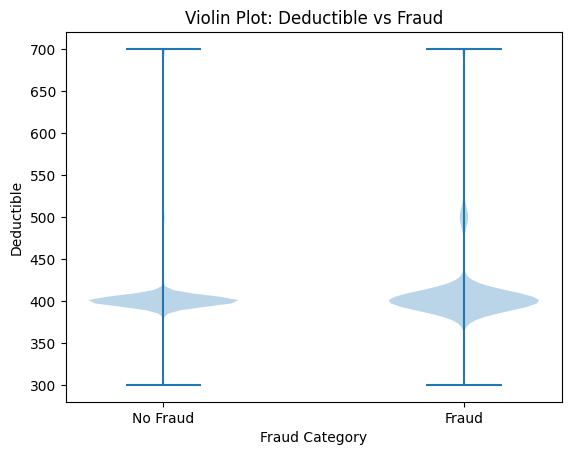

In [27]:
plt.figure()
plt.violinplot([
    df[df['FraudFound_P'] == 0]['Deductible'],
    df[df['FraudFound_P'] == 1]['Deductible']
])
plt.xticks([1, 2], ['No Fraud', 'Fraud'])
plt.xlabel("Fraud Category")
plt.ylabel("Deductible")
plt.title("Violin Plot: Deductible vs Fraud")
plt.show()


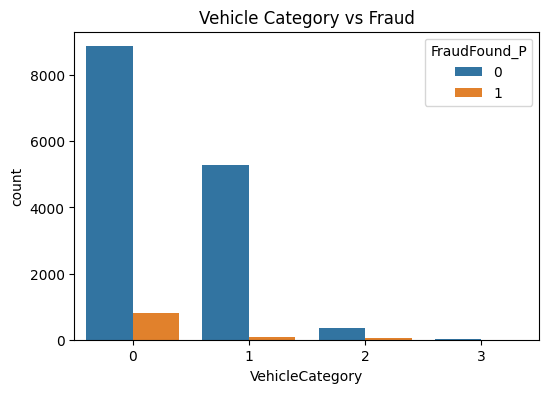

In [28]:
# 4.Vehicle Category vs Fraud

plt.figure(figsize=(6,4))
sns.countplot(x='VehicleCategory', hue='FraudFound_P', data=df)
plt.title('Vehicle Category vs Fraud')
plt.show()


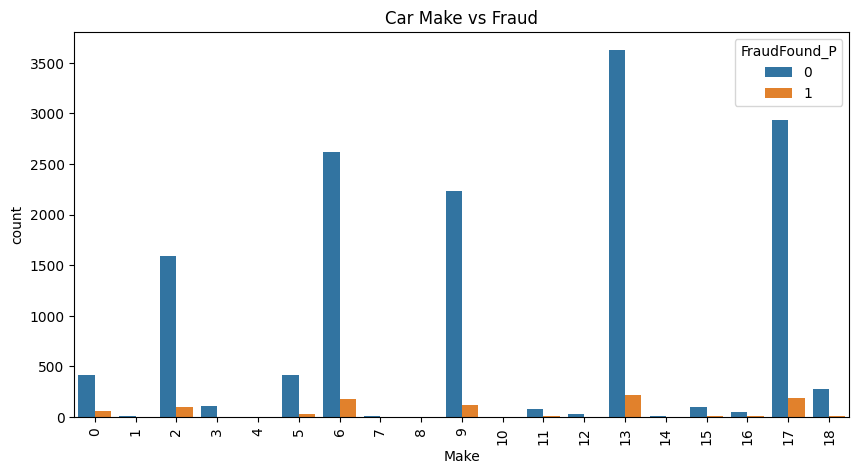

In [29]:
# 5.Car Make vs Fraud

plt.figure(figsize=(10,5))
sns.countplot(x='Make', hue='FraudFound_P', data=df)
plt.xticks(rotation=90)
plt.title('Car Make vs Fraud')
plt.show()


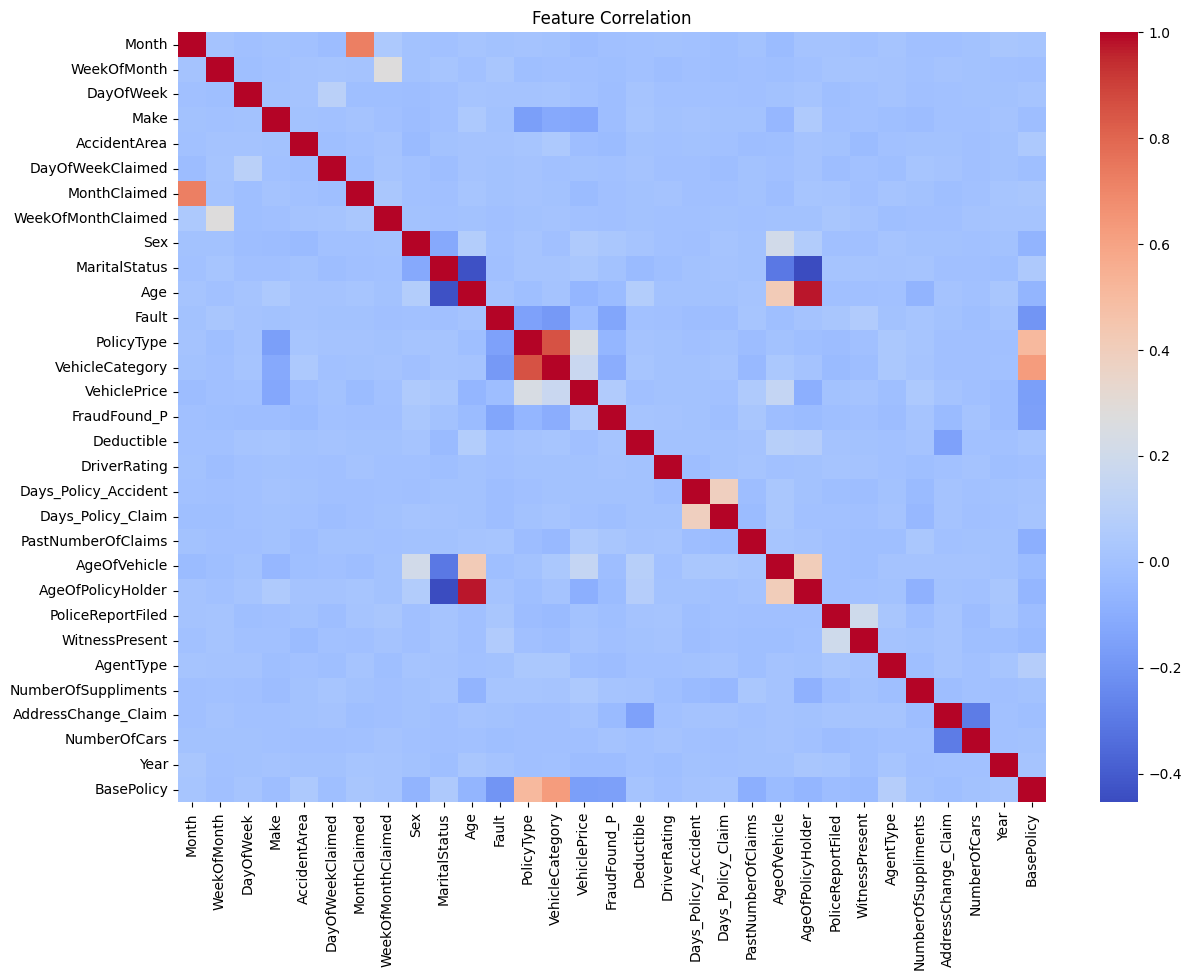

In [30]:
# 6.Correlation Heatmap

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


In [31]:
# Feature Selection & Train-Test Split

X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [32]:
# Machine Learning Models

# 1.Decision Tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm)


Decision Tree Accuracy: 0.8897535667963683
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3624
           1       0.17      0.23      0.20       231

    accuracy                           0.89      3855
   macro avg       0.56      0.58      0.57      3855
weighted avg       0.90      0.89      0.90      3855

Confusion Matrix:
 [[3378  246]
 [ 179   52]]


In [40]:
# 2. Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)


Random Forest Accuracy: 0.9413748378728923
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3624
           1       0.86      0.03      0.05       231

    accuracy                           0.94      3855
   macro avg       0.90      0.51      0.51      3855
weighted avg       0.94      0.94      0.91      3855

Random Forest Confusion Matrix:
 [[3623    1]
 [ 225    6]]


In [34]:
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42,stratify=y)


In [36]:
imputer = SimpleImputer(strategy='median')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [41]:
#.3. Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes Confusion Matrix:\n", cm_nb)


Naive Bayes Accuracy: 0.8306095979247731
              precision    recall  f1-score   support

           0       0.96      0.86      0.90      3624
           1       0.16      0.41      0.23       231

    accuracy                           0.83      3855
   macro avg       0.56      0.63      0.57      3855
weighted avg       0.91      0.83      0.86      3855

Naive Bayes Confusion Matrix:
 [[3107  517]
 [ 136   95]]


In [42]:
# 4.Logistic Regression 

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:\n", cm_lr )


Logistic Regression Accuracy: 0.9400778210116731
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3624
           1       0.00      0.00      0.00       231

    accuracy                           0.94      3855
   macro avg       0.47      0.50      0.48      3855
weighted avg       0.88      0.94      0.91      3855

Logistic Regression Confusion Matrix:
 [[3624    0]
 [ 231    0]]


C:\Users\shubham jadhav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shubham jadhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shubham jadhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and be

In [39]:
# Model Comparison

model_results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_lr)
    ]
})

print(model_results)


                 Model  Accuracy
0        Decision Tree  0.889754
1        Random Forest  0.941375
2          Naive Bayes  0.830610
3  Logistic Regression  0.940078


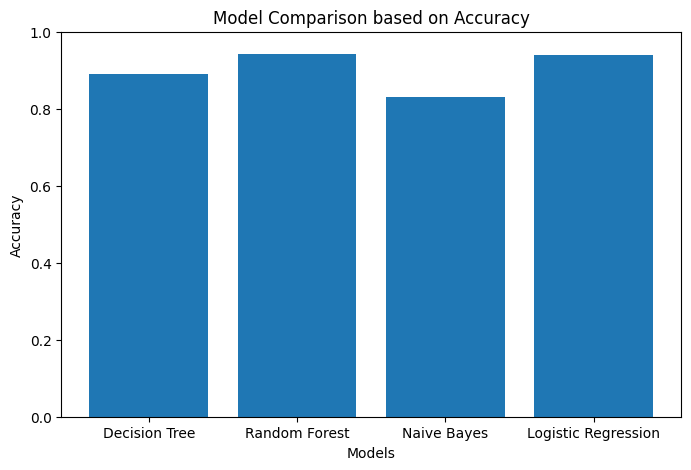

In [43]:
plt.figure(figsize=(8, 5))
plt.bar(model_results['Model'], model_results['Accuracy'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison based on Accuracy')
plt.ylim(0, 1)   # because accuracy range is 0 to 1
plt.show()